<h1 align="center"> CSE 242 Assignment 4, Fall 2021


# Kernel Methods with Noisy Setting

**SVM on synthetic dataset generated as follows:**

- $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives a $2000$ example training set. Repeating the above to draw a test set the same way.

Use a SVM package (I used scikit-learn's svm.SVC class) to learn SVMs with a variety of parameter settings. 

##### Using multivariate normal/Gaussian distribution to generate the training data:

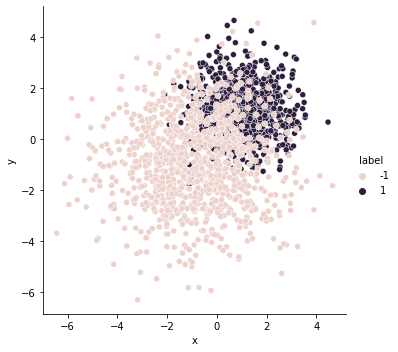

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
mean1 = (1, 1)
cov1 = [[1, 0], [0, 1]]
mean2 = (-1, -1)
cov2 = [[3, 0], [0, 3]]
df1 = pd.DataFrame(np.random.multivariate_normal(mean1,cov1,1000),columns=['x','y'])
df1['label'] = +1
df2 = pd.DataFrame(np.random.multivariate_normal(mean2,cov2,1000),columns=['x','y'])
df2['label'] = -1
df_train = pd.concat([df1,df2], ignore_index=True)
sns.relplot(x='x',y='y',data=df_train,kind='scatter',hue='label')

In [2]:
#Shuffling training data to avoid consistency in labels
df_train = shuffle(df_train)
df_train = df_train.reset_index(drop=True)
df_train.shape

(2000, 3)

In [3]:
df_train.head(20)

,x,y,label
0,0.192947,1.792390,1
1,2.043452,0.236179,1
2,-0.686073,0.898430,1
3,-0.912809,-4.155892,-1
4,-2.163852,-1.257497,-1
5,-0.880907,-0.884727,-1
6,0.096790,1.026457,1
7,1.959796,0.904622,1
8,2.806897,-0.014813,1
9,2.112044,0.247291,1


##### Same procedure repeated to generate test data:

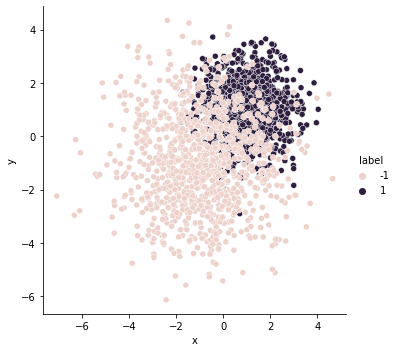

In [4]:
df1 = pd.DataFrame(np.random.multivariate_normal(mean1,cov1,1000),columns=['x','y'])
df1['label'] = +1
df2 = pd.DataFrame(np.random.multivariate_normal(mean2,cov2,1000),columns=['x','y'])
df2['label'] = -1
df_test = pd.concat([df1,df2], ignore_index=True)
sns.relplot(x='x',y='y',data=df_test,kind='scatter',hue='label')

In [5]:
#Shuffling test data to avoid consistency in labels
df_test = shuffle(df_test)
df_test = df_test.reset_index(drop=True)
df_test.shape

(2000, 3)

In [6]:
df_test.head(20)

,x,y,label
0,2.383552,2.481920,1
1,-0.992730,0.946550,1
2,0.563942,0.868742,1
3,-4.321686,-2.726865,-1
4,-1.814443,1.540620,-1
5,1.026246,1.021753,1
6,-0.440983,-3.767917,-1
7,0.462348,0.335326,1
8,-0.583042,-0.334120,1
9,-1.057248,-1.142173,-1


 
- Using an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flipping their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flipping their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. We can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
import random
X_train =df_train[['x', 'y']]
y_train =df_train['label'].values
X_test = df_test[['x', 'y']]
y_test = df_test['label'].values


model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01, random_state = 21)
model = model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy score before introducing randomness: ",accuracy)

Accuracy score before introducing randomness:  0.8785


##### Introducing randomness at each iteration(example=20) at the given probabilies and calculating average accuracy:

In [8]:
import statistics
accuracy_list = []

for k in range(20):
    df3 = df_train.copy()
    n =  len(df3)
    a = random.sample(list(range(n)),int(0.35*n))
    b = random.sample(list(range(n)),int(0.2*n))
    for i in range(n):
        if i in a and df3['label'][i] == 1:
            df3['label'][i] = -1*df3['label'][i]
        elif i in b and df3['label'][i] == -1:
            df3['label'][i] = -1*df3['label'][i]

    X_train =df3[['x', 'y']]
    y_train =df3['label'].values
    X_test = df_test[['x', 'y']]
    y_test = df_test['label'].values


    model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01)
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracy_list.append(accuracy)
    
#Referred: https://stackoverflow.com/questions/58608615/flipping-labels-with-a-certain-probability-for-the-robustness-test-of-a-k-neares

C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] = -1*df3['label'][i]
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] = -1*df3['label'][i]
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] =

C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] = -1*df3['label'][i]
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] = -1*df3['label'][i]
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2953054445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['label'][i] =

In [9]:
print(accuracy_list)
average_accuracy = statistics.mean(accuracy_list)
print("Average accuracy after introducing randomness(20 iterations): ",average_accuracy)

[0.8185, 0.846, 0.833, 0.8185, 0.8315, 0.8135, 0.829, 0.83, 0.8175, 0.854, 0.8295, 0.8405, 0.799, 0.7955, 0.8405, 0.839, 0.8275, 0.842, 0.8535, 0.85]
Average accuracy after introducing randomness(20 iterations):  0.830425



- Tried using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then training the model with the newly processed training dataset. 

- Reporting the accuracy on the testing dataset in the noise parameter setting and observing performance improvement.


##### Finding optimal 'K' to increase accuracy

C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid fe

C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid fe

Text(0, 0.5, 'error rate')

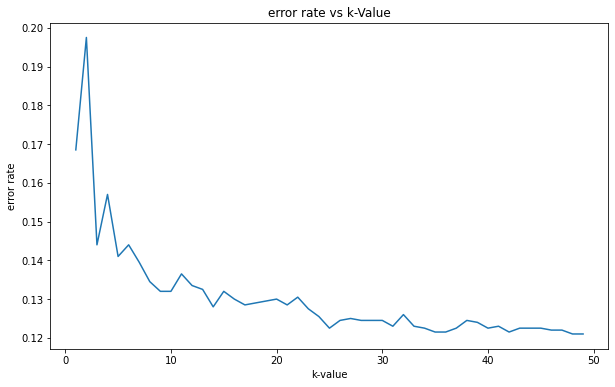

In [10]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

X_train =df_train[['x', 'y']]
y_train =df_train['label'].values
X_test = df_test[['x', 'y']]
y_test = df_test['label'].values
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate)
plt.title('error rate vs k-Value')
plt.xlabel('k-value')
plt.ylabel('error rate')

In [11]:
print("Minimum error at k=",error_rate.index(min(error_rate)))
e = error_rate.index(min(error_rate))

Minimum error at k= 47


In [12]:
#Using the optimal k found to increase accuracy
X_train1 =df3[['x', 'y']]
knn = KNeighborsClassifier(n_neighbors = e)
knn.fit(X_train,y_train)
pred = knn.predict(X_train1)

C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
#Correcting wrong labels

df4 = df3.copy()
df4['label'] = pred

In [14]:
from sklearn.metrics import accuracy_score
X_train_afterknn =df4[['x', 'y']]
y_train_afterknn =df4['label'].values
X_test_afterknn = df_test[['x', 'y']]
y_test_afterknn = df_test['label'].values

model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01, random_state=21)
model = model.fit(X_train_afterknn, y_train_afterknn)

y_pred_afterknn = model.predict(X_test_afterknn)
accuracy = model.score(X_test_afterknn, y_test_afterknn)
print("Accuracy score after removing randomness using knn: ",accuracy)


#Additional validation
accuracy_score(y_pred_afterknn, y_test_afterknn)

Accuracy score after removing randomness using knn:  0.8725


0.8725

After correcting the noisy labels using KNN, the accuracy has improved


- Trying to using **Clustering(Example: Kmeans)** to correct wrong labels before training. 

- Then training the model with the newly processed training dataset. 

- Reporting the accuracy on the testing dataset in the noise parameter setting and observing performance improvement.

##### K-MEANS CLUSTERING:

In [15]:
from sklearn.cluster import KMeans

X_train1 =df3[['x', 'y']]
km = KMeans(n_clusters=2, random_state=21)
km.fit(X_train1)
predicted_clusters = km.predict(X_train1)
df3['cluster'] = predicted_clusters

In [16]:
df3.tail()

,x,y,label,cluster
1995,3.200216,-1.134786,-1,0
1996,-3.660857,0.017567,1,1
1997,1.237206,-0.316216,-1,0
1998,-0.487876,-0.794591,-1,1
1999,0.119941,-4.246949,-1,1


##### Replacing each cluster by the dominant value:

In [17]:
#Finding the label with the maximum count in each cluster and replacing the whole cluster with it
w,x,y,z = 0,0,0,0
for i in range(n):
    if df3['cluster'][i]== 0 and df3['label'][i]== 1:
        w+=1
    elif df3['cluster'][i]== 0 and df3['label'][i]== -1:
        x+=1
    elif df3['cluster'][i]==1 and df3['label'][i]== 1:
        y+=1
    else:
        z+=1
        
s = max(w,x,y,z)
if s==w or s==x:
    if w>x:
        cluster0, cluster1 = 1, -1
    else:
        cluster0, cluster1 = -1, 1
else:
    if y>z:
        cluster0, cluster1 = -1, 1
    else:
        cluster0, cluster1 = 1, -1
        
print("Cluster 0 : ",cluster0)
print("Cluster 1 : ",cluster1)
print("Cluster 0 has "+str(w)+" 1s")
print("Cluster 0 has "+str(x)+" -1s")
print("Cluster 1 has "+str(y)+" 1s")
print("Cluster 1 has "+str(z)+" -1s")

Cluster 0 :  1
Cluster 1 :  -1
Cluster 0 has 703 1s
Cluster 0 has 579 -1s
Cluster 1 has 150 1s
Cluster 1 has 568 -1s


In [18]:
df6 = df3.copy()

for i in range(n):
    if df6['cluster'][i] == 0:
        df6['label'][i] = cluster0
    else:
        df6['label'][i] = cluster1
        
df6.head()

C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/470224038.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['label'][i] = cluster0
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/470224038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['label'][i] = cluster1


,x,y,label,cluster
0,0.192947,1.792390,1,0
1,2.043452,0.236179,1,0
2,-0.686073,0.898430,1,0
3,-0.912809,-4.155892,-1,1
4,-2.163852,-1.257497,-1,1


Corrected training data trained again: (less accuracy because it is unsupervised)

In [19]:
X_train_afterkmeans =df6[['x', 'y']]
y_train_afterkmeans =df6['label'].values
X_test_afterkmeans = df_test[['x', 'y']]
y_test_afterkmeans = df_test['label'].values

model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01, random_state = 21)
model = model.fit(X_train_afterkmeans, y_train_afterkmeans)

y_pred_afterkmeans = model.predict(X_test_afterkmeans)
accuracy = model.score(X_test_afterkmeans, y_test_afterkmeans)
print("Accuracy score after removing randomness using kmeans: ",accuracy)

#Additional validation
accuracy_score(y_pred_afterkmeans, y_test_afterkmeans)

Accuracy score after removing randomness using kmeans:  0.836


0.836

The accuracy after k-means is comparitively less as it is unsupervised and the labels are labelled based on the cluster. But the accuracy has improved a little though.

EM CLUSTERING:

In [20]:
from sklearn.mixture import GaussianMixture
df5 = df3.copy()
df5 = df5.drop('cluster', 1)
X_train1 =df5[['x', 'y']]
gm = GaussianMixture(n_components=2, random_state=21)
gm.fit(X_train1)
predicted_clusters = gm.predict(X_train1)
df5['group'] = predicted_clusters

#Referred: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/4149681908.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df5 = df5.drop('cluster', 1)


In [21]:
df5.head()

,x,y,label,group
0,0.192947,1.792390,-1,0
1,2.043452,0.236179,-1,0
2,-0.686073,0.898430,-1,0
3,-0.912809,-4.155892,-1,1
4,-2.163852,-1.257497,-1,1


##### Replacing each group by the dominant value:

In [22]:
#Finding the label with the maximum count in each group and replacing the whole cluster with it
w,x,y,z = 0,0,0,0
for i in range(n):
    if df5['group'][i]== 0 and df3['label'][i]== 1:
        w+=1
    elif df5['group'][i]== 0 and df3['label'][i]== -1:
        x+=1
    elif df5['group'][i]==1 and df3['label'][i]== 1:
        y+=1
    else:
        z+=1
        
s = max(w,x,y,z)
if s==w or s==x:
    if w>x:
        cluster0, cluster1 = 1, -1
    else:
        cluster0, cluster1 = -1, 1
else:
    if y>z:
        cluster0, cluster1 = -1, 1
    else:
        cluster0, cluster1 = 1, -1
        
print("Group 0 : ",cluster0)
print("Group 1 : ",cluster1)
print("Group 0 has "+str(w)+" 1s")
print("Group 0 has "+str(x)+" -1s")
print("Group 1 has "+str(y)+" 1s")
print("Group 1 has "+str(z)+" -1s")

Group 0 :  1
Group 1 :  -1
Group 0 has 699 1s
Group 0 has 554 -1s
Group 1 has 154 1s
Group 1 has 593 -1s


In [23]:
for i in range(n):
    if df5['group'][i] == 0:
        df5['label'][i] = cluster0
    else:
        df5['label'][i] = cluster1
        
df5.head()

C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2445228501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['label'][i] = cluster0
C:\Users\Hariesh\AppData\Local\Temp/ipykernel_13384/2445228501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['label'][i] = cluster1


,x,y,label,group
0,0.192947,1.792390,1,0
1,2.043452,0.236179,1,0
2,-0.686073,0.898430,1,0
3,-0.912809,-4.155892,-1,1
4,-2.163852,-1.257497,-1,1


In [24]:
X_train_afterem =df5[['x', 'y']]
y_train_afterem =df5['label'].values
X_test_afterem = df_test[['x', 'y']]
y_test_afterem = df_test['label'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01, random_state = 21)
model = model.fit(X_train_afterem, y_train_afterem)

#pred_labels_train = model.predict(X_train)
y_pred_afterem = model.predict(X_test_afterem)
accuracy = model.score(X_test_afterem, y_test_afterem)
print("Accuracy score after removing randomness using EM: ",accuracy)

accuracy_score(y_pred_afterem, y_test_afterem)

Accuracy score after removing randomness using EM:  0.849


0.849

The accuracy has improved after removing noise based on EM clustering but not as good as KNN because clustering is unsupervised.

# Binary Image Classification:

We will perform a binary image classification task with scikit-learn implemented models. We will see the importance of a powerful feature extractor. We will also perform hyper-parameter tunning and select machine learning models with scikit-learn.

In [25]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hariesh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


#### Import/Install required packages (i.e., [Pillow](https://pillow.readthedocs.io/en/latest/installation.html))

In [26]:
# Import libraries
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Data preprocessing

In [27]:
# A help function which appends the path list for train and test image folder
def get_path(is_train=True):
    if is_train:
        directory = "train"
    else:
        directory = "test"

    # Append the image path to a list for imgaes that contain a hotdog    
    hot_dog_image_dir = f'./{directory}/hot_dog'
    hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in os.listdir(hot_dog_image_dir)]
    

    # Append the image path to a list for imgaes that don't contain a hotdog   
    not_hot_dog_image_dir = f'./{directory}/not_hot_dog'
    not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in os.listdir(not_hot_dog_image_dir)]

    img_paths = hot_dog_paths + not_hot_dog_paths
    
    # Return the unshuffled image paths
    return img_paths

In [28]:
# Show how many figures contained in the train and test dataset
print(f"There are {len(get_path())} train images and {len(get_path(is_train=False))} test images.")

There are 498 train images and 500 test images.


Take a look at a few randomly selected example images we will deal with.

[330, 248, 280, 51, 364, 219, 280, 304, 240, 310]


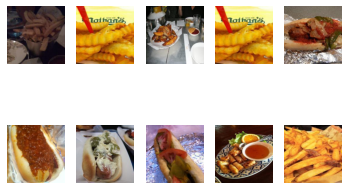

In [29]:
import random 

fig,ax = plt.subplots(2,5)
index_list = [random.randrange(1, len(get_path()), 1) for i in range(10)]
print(index_list)
train_paths = get_path()

filenames=[train_paths[idx] for idx in index_list] 
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
        ax[i%2][i//2].axis('off')
fig.show()

#### The images may have different shape/size.

In [30]:
# See the shape of an image
sample_img = Image.open(train_paths[1])
print(np.array(sample_img).shape)

(200, 200, 3)


#### Standard PCA methods implemented in Scikit-learn do not work for color imgaes (RGB), so we will transform the images into greyscale.

In [31]:
import matplotlib

# Transform color images to greyscale
def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

# Given the image path, return the resized image as an numpy 2d array
def get_image(path):
    img = Image.open(path)
    img = img.resize((200,200))
    img.save(path)
    img = matplotlib.image.imread(path)
    gray = rgb2gray(img)  
    return np.array(gray)

In [32]:
print(get_image(train_paths[1]).shape)

(200, 200)


#### Append image data and labels in to list

In [33]:
# Prepare the raw data: geryscale, train images and train labels
h, w = get_image(train_paths[1]).shape
train_data = np.empty((len(train_paths), h, w))
train_label = [1] * np.int(len(train_paths)/2) + [0] * np.int(len(train_paths)/2)
count = -1
for pth in train_paths:
    count += 1
    image = get_image(pth)
    train_data[count] = image
n_samples = train_data.shape[0]
X = np.empty((n_samples, h * w))
for i in range(n_samples):
    X[i] = train_data[i].flatten()
y = train_label
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


#### Prepare the raw test data

In [34]:
test_paths = get_path(is_train=False)


# Prepare the raw dataframe: geryscale, test images and test labels
test_data = np.empty((len(test_paths), h, w))
test_label = [1] * np.int(len(test_paths)/2) + [0] * np.int(len(test_paths)/2)
count = -1
for pth in test_paths:
    count += 1
    image = get_image(pth)
    test_data[count] = image
X_test = np.empty((len(test_paths), h * w))
for i in range(n_samples):
    X_test[i] = test_data[i].flatten()
y_test = test_label
print(f"The shape of the test data is {X_test.shape}")

The shape of the test data is (500, 40000)


#### Shuffle the training dataset

In [35]:
# Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X, y, random_state=0)
X_train
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


## Dimensionality Reduction


After using various Dimensionality reduction techniques like PCA, KernalPCA, LDA, ISOMAP, SVD, Factor Analysis and t-SNE, cosidering accuracy, I went for SVD. I took 400 components as initial 5-10% of the initial features contain most of the data required to represent the image.

In [36]:
from sklearn.decomposition import TruncatedSVD
#Taking n-components to be 400 as 10% of the features maximum data 
svd = TruncatedSVD(n_components=400, random_state=21)
X_train4 = svd.fit_transform(X_train)
X_test4 = svd.transform(X_test)
X_train4.shape

(498, 400)

In [37]:
X_test4.shape

(500, 400)

## Binary Image Classification 

We will need to find the most suitable machine learning models (as well as hyper-parameters) implemented in <code>Scikit-learn</code>, for example, fit on the projected training data and labels, then predict on the projected test data. The accuracy score determines the accuracy your model prediction.

##### Classifier Comparison:

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
]

for clf in classifiers:
    clf.fit(X_train4, y_train)
    pred = clf.predict(X_test4)
    score = clf.score(X_test4, y_test)
    print(clf,accuracy_score(pred, y_test))
    
#Referred: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

KNeighborsClassifier() 0.58
SVC() 0.574
GaussianProcessClassifier() 0.5
DecisionTreeClassifier() 0.552
RandomForestClassifier() 0.564
AdaBoostClassifier() 0.532
GaussianNB() 0.484


##### Found KNN to be providing more accuracy than other classifiers. Hence finding out the best 'K' to improve accuracy.

##### Though Kernel PCA gives good accuracy using SVM and hyper parameter tuning, it offered less accuracy compared to KNN!

Text(0, 0.5, 'error rate')

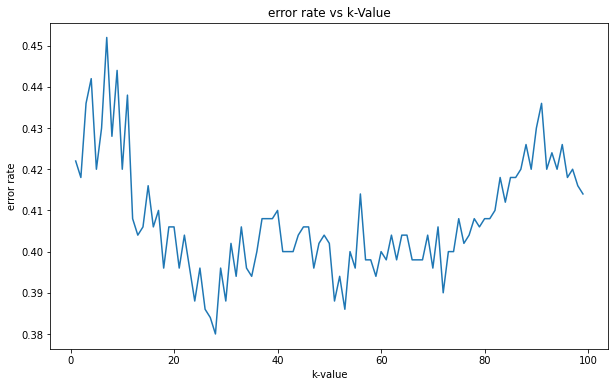

In [39]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train4,y_train)
    pred_i = knn.predict(X_test4)
    error_rate.append(np.mean(pred_i != y_test))    

plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate)
plt.title('error rate vs k-Value')
plt.xlabel('k-value')
plt.ylabel('error rate')

In [40]:
print("Minimum error at k=",error_rate.index(min(error_rate)))
e = error_rate.index(min(error_rate))

Minimum error at k= 27


In [41]:
#Using the minimum error 'K' to improve accuracy
knn = KNeighborsClassifier(n_neighbors = e)
knn.fit(X_train4,y_train)
pred = knn.predict(X_test4)

In [42]:
print('Accuracy after KNN with optimal k-value (after improvization): ',accuracy_score(pred, y_test)) #61.6%

Accuracy after KNN with optimal k-value (after improvization):  0.616


##### I have attached Kernel PCA and GridSearchCV codes for clarification. (Just because why SVM wasn't chosen and why I went for KNN)

In [46]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=400, random_state=21)
X_train5 = kpca.fit_transform(X_train)
X_test5 = kpca.transform(X_test)
X_train5.shape

(498, 400)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd
param_grid= {'kernel': ('linear', 'rbf', 'poly'),
              'C': [0.1, 0.5, 0.01, 0.05, 1, 2, 5, 10, 50, 100]}
base_estimator = SVC(gamma='scale')
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                          factor=2, min_resources='exhaust', random_state = 21).fit(X_train5, y_train)
pred = sh.predict(X_test5)
accuracy_score(pred, y_test)

0.584

In [60]:
sh.best_estimator_

SVC(C=5)

This is why I went for KNN!